*Importing Necessary Libraries*

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import openpyxl
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

warnings.filterwarnings('ignore') # for ignoring warnings to keep the notebook clean (relevant issues are handled in later sections)

*Loading Dataset*

In [2]:
import pandas as pd

# Load the XLS file
file_path = 'Patients Information Of Cardiac Dataset.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)



*Data Preprocessing*

In [3]:
df.shape

(120, 7)

In [4]:
df.head()

,Unnamed: 0,Gender (Male or Female),Age (year),Calcium score,Epicardial Tissue Volume (ml),Pericardial (Mediastinal) Tissue Volume(ml),Sum of Cardiac Fats(ml) or Paracardial (Thoracic) Tissue Volume
0,Patient_1,F,58,0.0,83.74,42.96,126.70
1,Patient_2,M,18,0.0,48.33,14.39,62.72
2,Patient_3,F,56,2.0,69.70,42.02,111.72
3,Patient_4,F,59,119.7,75.45,65.02,140.47
4,Patient_5,F,55,71.1,105.02,92.85,197.87


*Rename column unnamed to Number of Patients*

In [5]:
# Rename the 'Unnamed: 0' column to 'Number of Patients'
df = df.rename(columns={'Unnamed: 0': 'Number of Patients'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Number of Patients                                               120 non-null    object 
 1   Gender (Male or Female)                                          120 non-null    object 
 2   Age (year)                                                       120 non-null    int64  
 3   Calcium score                                                    120 non-null    float64
 4   Epicardial Tissue Volume (ml)                                    120 non-null    float64
 5   Pericardial (Mediastinal) Tissue Volume(ml)                      120 non-null    float64
 6   Sum of Cardiac Fats(ml) or Paracardial (Thoracic) Tissue Volume  120 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usa

In [7]:
df.describe()

,Age (year),Calcium score,Epicardial Tissue Volume (ml),Pericardial (Mediastinal) Tissue Volume(ml),Sum of Cardiac Fats(ml) or Paracardial (Thoracic) Tissue Volume
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,55.475000,110.183333,96.562167,59.171417,155.735333
std,12.602496,271.636890,34.518040,22.540395,54.531509
min,17.000000,0.000000,22.570000,6.780000,29.350000
25%,49.000000,0.000000,70.007500,44.120000,117.237500
50%,56.000000,0.500000,92.000000,57.770000,148.610000
75%,64.000000,54.225000,121.687500,74.525000,192.432500
max,82.000000,1905.100000,183.340000,124.560000,274.120000


In [8]:
df.columns

Index(['Number of Patients', 'Gender (Male or Female)', 'Age (year)',
       'Calcium score', 'Epicardial Tissue Volume (ml)',
       'Pericardial (Mediastinal) Tissue Volume(ml)',
       'Sum of Cardiac Fats(ml) or Paracardial (Thoracic) Tissue Volume'],
      dtype='object')

*Checking Unique Values*

In [9]:
df.nunique()

Number of Patients                                                 120
Gender (Male or Female)                                              2
Age (year)                                                          45
Calcium score                                                       58
Epicardial Tissue Volume (ml)                                      117
Pericardial (Mediastinal) Tissue Volume(ml)                        118
Sum of Cardiac Fats(ml) or Paracardial (Thoracic) Tissue Volume    118
dtype: int64

*Checking For NUll Values*

In [10]:
df.isnull().sum()

Number of Patients                                                 0
Gender (Male or Female)                                            0
Age (year)                                                         0
Calcium score                                                      0
Epicardial Tissue Volume (ml)                                      0
Pericardial (Mediastinal) Tissue Volume(ml)                        0
Sum of Cardiac Fats(ml) or Paracardial (Thoracic) Tissue Volume    0
dtype: int64

*Adding New Column based on clacium score as a target column*

In [11]:
# Define function to categorize calcium score
def categorize_calcium_score(score):
    if score < 100:
        return 'Low risk'
    elif 100 <= score <= 300:
        return 'Moderate risk'
    else:
        return 'High risk'

# Apply the function to the 'Calcium score' column and create a new column 'Risk Category'
df['Risk Category'] = df['Calcium score'].apply(categorize_calcium_score)

# Display the first few rows to verify the new 'Risk Category' column
df[['Calcium score', 'Risk Category']].head()


,Calcium score,Risk Category
0,0.0,Low risk
1,0.0,Low risk
2,2.0,Low risk
3,119.7,Moderate risk
4,71.1,Low risk


*Pairplot on Risk category*

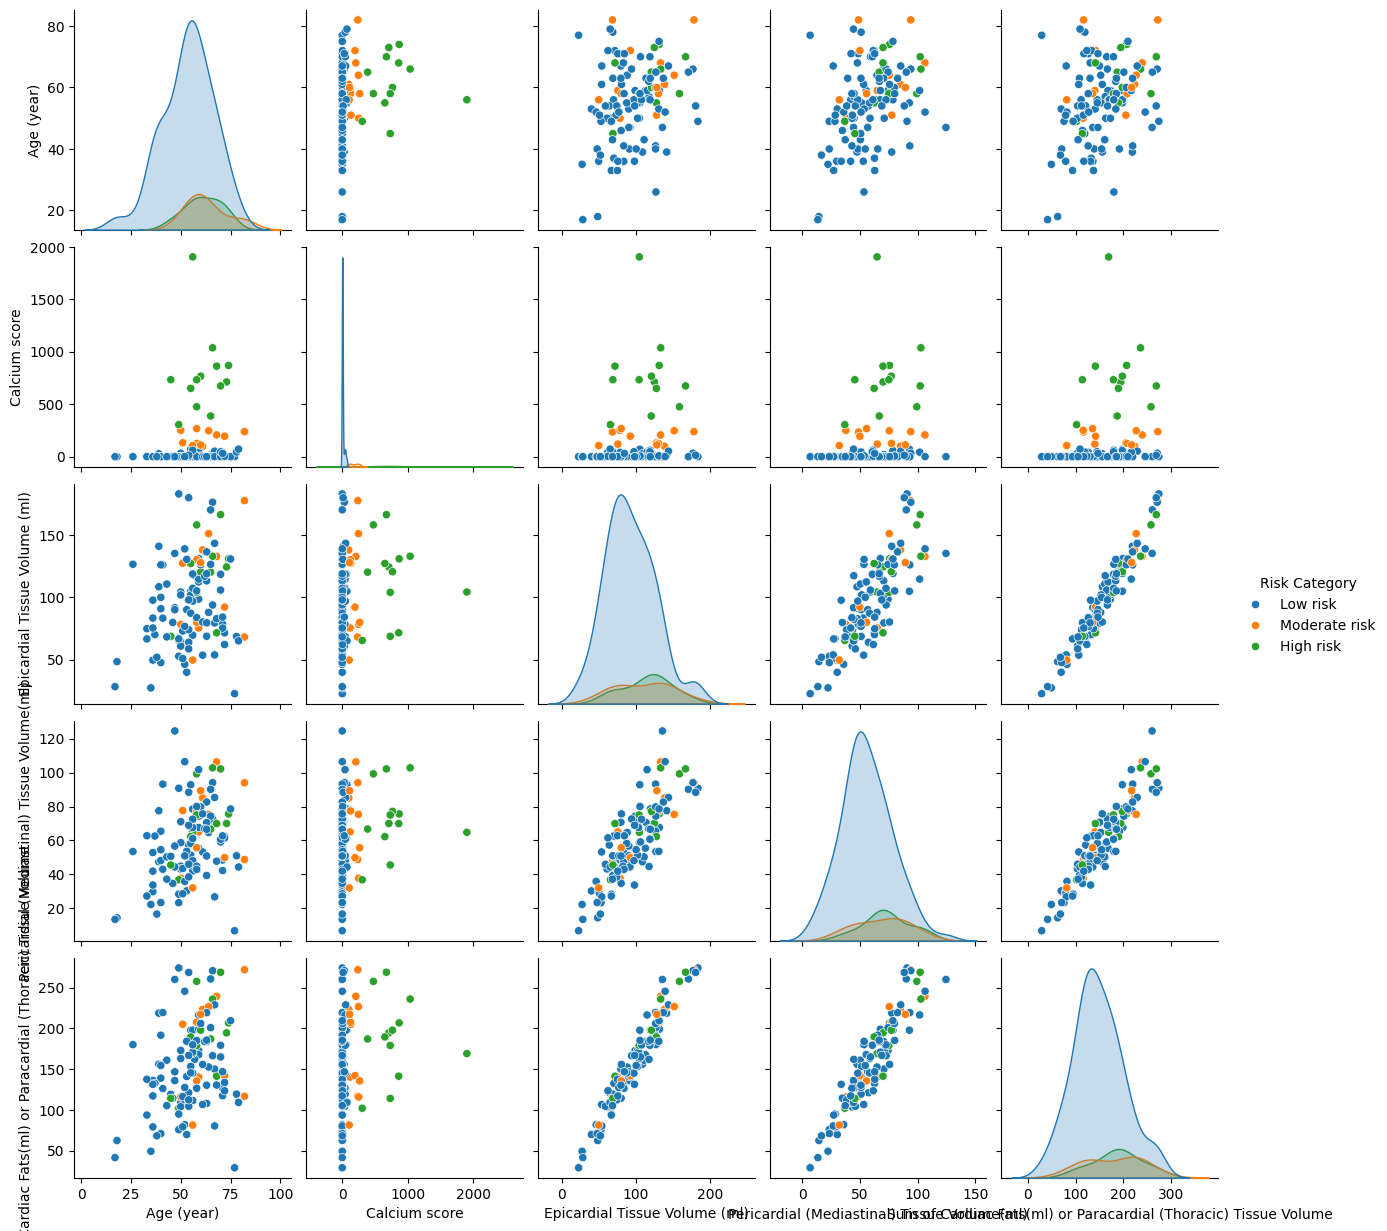

In [12]:
import seaborn as sns
sns.pairplot(df,hue = 'Risk Category')

*Gender Distribution*

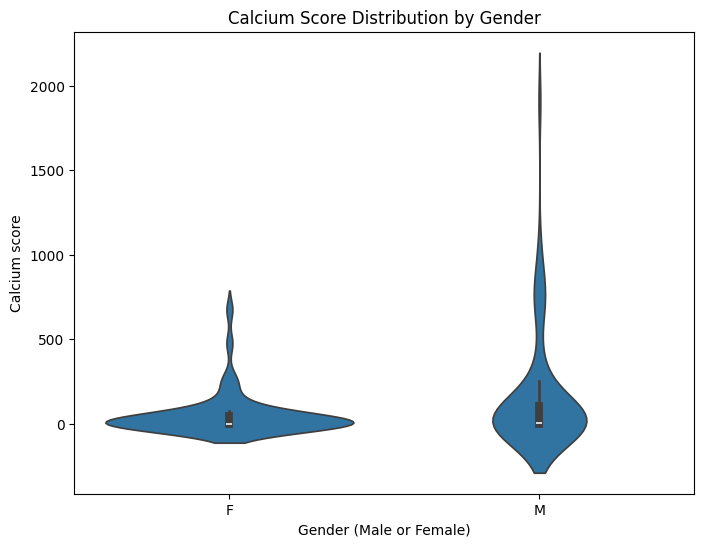

In [13]:
from scipy.stats import ttest_ind



# 1. Summary statistics by gender
gender_group = df.groupby('Gender (Male or Female)')['Calcium score'].describe()


# 2. Violin plot for a detailed view
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender (Male or Female)', y='Calcium score', data=df)
plt.title('Calcium Score Distribution by Gender')
plt.show()

*Analyzing Tissue Volume and Age*

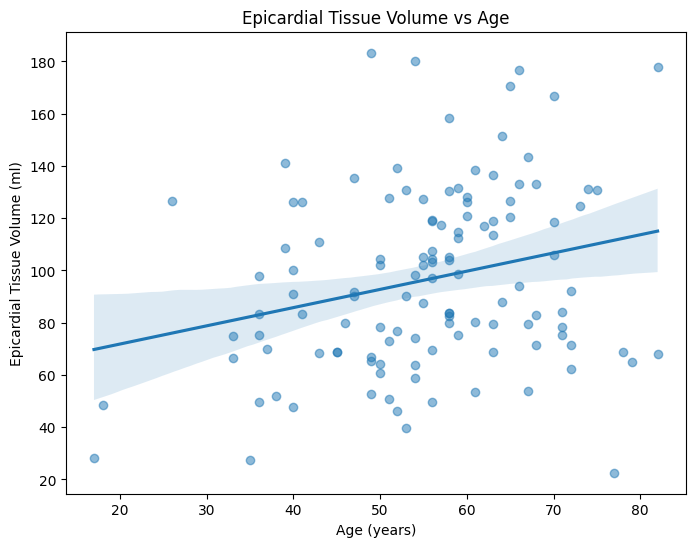

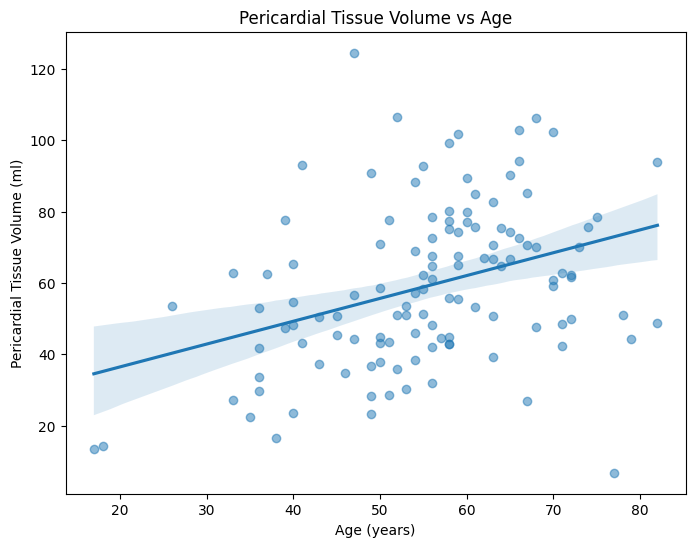

Pearson correlation between Age and Epicardial Tissue Volume: 0.25 (p-value: 0.0050)
Pearson correlation between Age and Pericardial Tissue Volume: 0.36 (p-value: 0.0001)


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr



# 1. Scatter plot with regression line for Epicardial Tissue Volume vs Age
plt.figure(figsize=(8, 6))
sns.regplot(x='Age (year)', y='Epicardial Tissue Volume (ml)', data=df, scatter_kws={'alpha':0.5})
plt.title('Epicardial Tissue Volume vs Age')
plt.xlabel('Age (years)')
plt.ylabel('Epicardial Tissue Volume (ml)')
plt.show()

# 2. Scatter plot with regression line for Pericardial Tissue Volume vs Age
plt.figure(figsize=(8, 6))
sns.regplot(x='Age (year)', y='Pericardial (Mediastinal) Tissue Volume(ml)', data=df, scatter_kws={'alpha':0.5})
plt.title('Pericardial Tissue Volume vs Age')
plt.xlabel('Age (years)')
plt.ylabel('Pericardial Tissue Volume (ml)')
plt.show()

# 3. Calculate Pearson correlation coefficients for Age vs Tissue Volumes
epicardial_corr, epicardial_p = pearsonr(df['Age (year)'], df['Epicardial Tissue Volume (ml)'])
pericardial_corr, pericardial_p = pearsonr(df['Age (year)'], df['Pericardial (Mediastinal) Tissue Volume(ml)'])

# Print correlation results
print(f"Pearson correlation between Age and Epicardial Tissue Volume: {epicardial_corr:.2f} (p-value: {epicardial_p:.4f})")
print(f"Pearson correlation between Age and Pericardial Tissue Volume: {pericardial_corr:.2f} (p-value: {pericardial_p:.4f})")


*Classifying Patients and Analyze Tissue Volumes across risk categories*

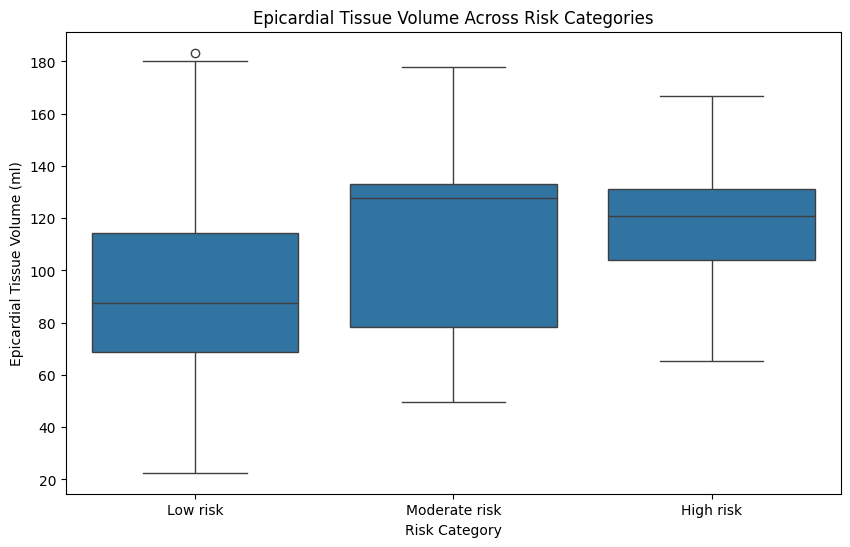

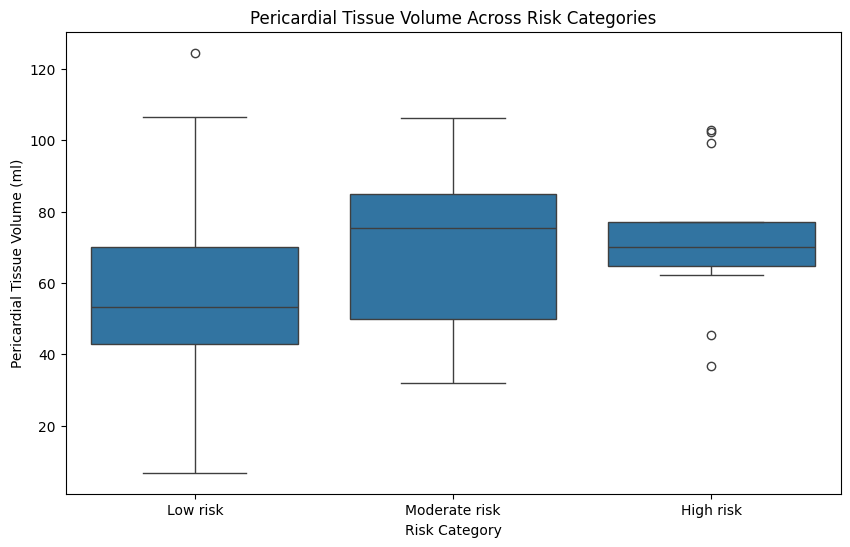

In [15]:

# 1. Analyze how Epicardial Tissue Volume varies across risk categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk Category', y='Epicardial Tissue Volume (ml)', data=df)
plt.title('Epicardial Tissue Volume Across Risk Categories')
plt.xlabel('Risk Category')
plt.ylabel('Epicardial Tissue Volume (ml)')
plt.show()

# 2. Analyze how Pericardial Tissue Volume varies across risk categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk Category', y='Pericardial (Mediastinal) Tissue Volume(ml)', data=df)
plt.title('Pericardial Tissue Volume Across Risk Categories')
plt.xlabel('Risk Category')
plt.ylabel('Pericardial Tissue Volume (ml)')
plt.show()



*Analyzing Calcium Score vs. Sum of Cardiac Fats*

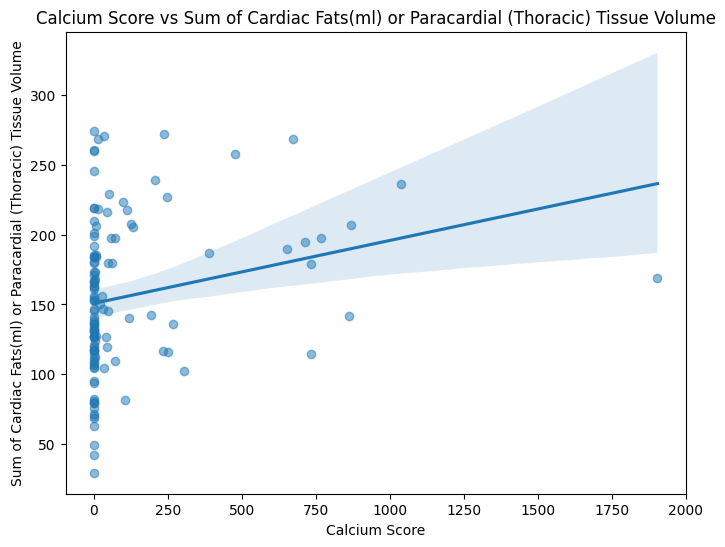

Pearson correlation between Calcium score and Sum of Cardiac Fats: 0.22 (p-value: 0.0137)


In [16]:


# Assuming there is a column 'Sum of Cardiac Fats (ml)' for sum of cardiac fats and 'Calcium score' for calcium scores
# 1. Scatter plot with regression line for Calcium score vs Sum of Cardiac Fats
plt.figure(figsize=(8, 6))
sns.regplot(x='Calcium score', y='Sum of Cardiac Fats(ml) or Paracardial (Thoracic) Tissue Volume', data=df, scatter_kws={'alpha': 0.5})
plt.title('Calcium Score vs Sum of Cardiac Fats(ml) or Paracardial (Thoracic) Tissue Volume')
plt.xlabel('Calcium Score')
plt.ylabel('Sum of Cardiac Fats(ml) or Paracardial (Thoracic) Tissue Volume')
plt.show()

# 2. Calculate Pearson correlation coefficient
corr, p_value = pearsonr(df['Calcium score'], df['Sum of Cardiac Fats(ml) or Paracardial (Thoracic) Tissue Volume'])

# Print correlation results
print(f"Pearson correlation between Calcium score and Sum of Cardiac Fats: {corr:.2f} (p-value: {p_value:.4f})")

# 3. Optional: Fit a linear regression model to quantify the relationship
import statsmodels.api as sm

# Adding constant for the regression model
X = sm.add_constant(df['Calcium score'])
model = sm.OLS(df['Sum of Cardiac Fats(ml) or Paracardial (Thoracic) Tissue Volume'], X).fit()



*Label Encoding*

In [17]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Encoding 'Label' column 
df['Risk Category'] = label_encoder.fit_transform(df['Risk Category'])
df['Number of Patients'] = label_encoder.fit_transform(df['Number of Patients'])
df['Gender (Male or Female)'] = label_encoder.fit_transform(df['Gender (Male or Female)'])
df['Risk Category']
df['Number of Patients']
df['Gender (Male or Female)']

0      0
1      1
2      0
3      0
4      0
      ..
115    0
116    0
117    0
118    0
119    1
Name: Gender (Male or Female), Length: 120, dtype: int64

In [18]:
df['Risk Category'].value_counts()

Risk Category
1    94
2    13
0    13
Name: count, dtype: int64

*Correlation*

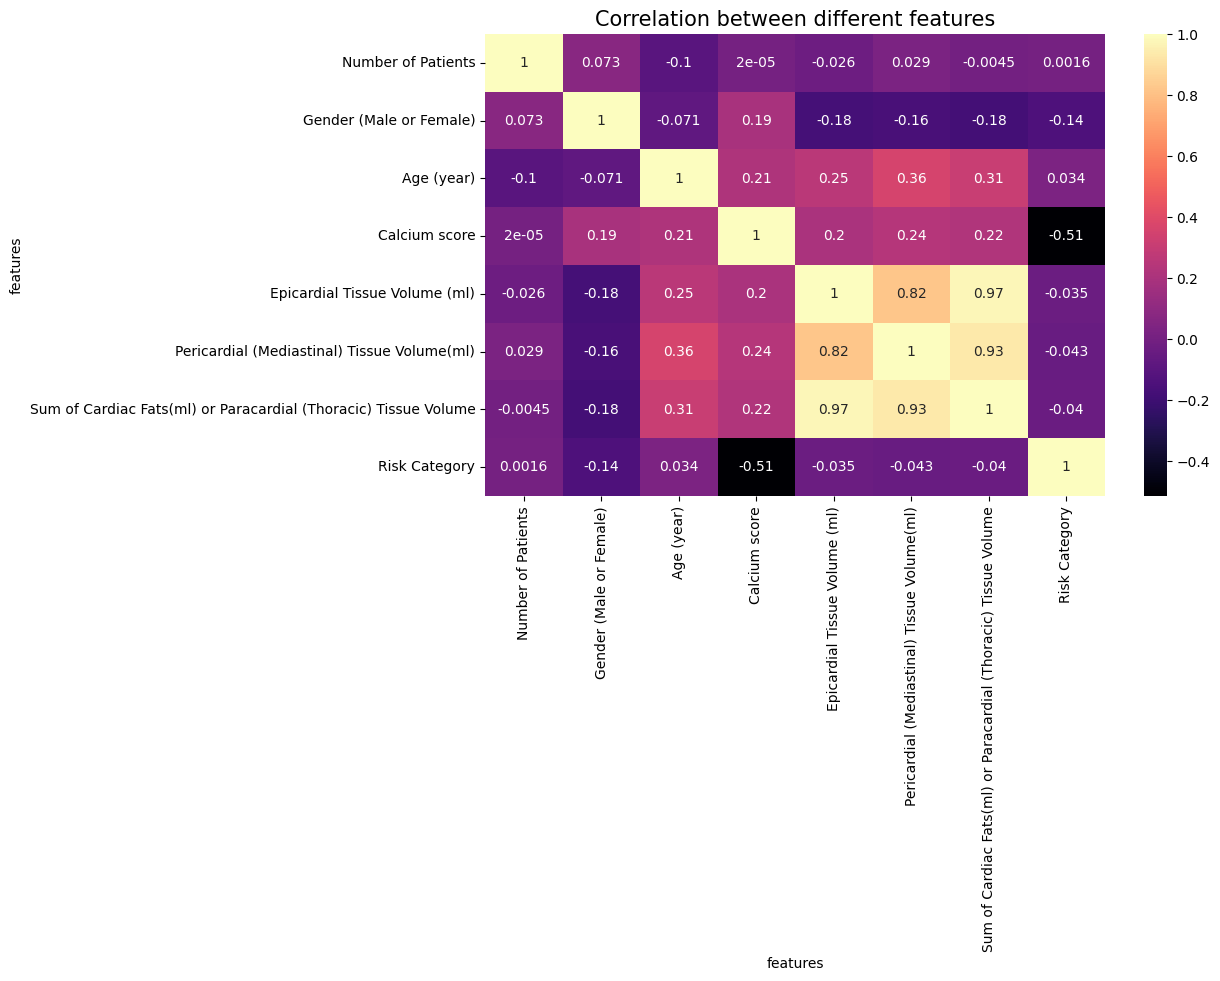

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.heatmap(df.corr(), annot=True,cmap='magma')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [20]:
# # Count the occurrences of each class
# class_counts = df['Risk Category'].value_counts()

# # Plotting the distribution of the target variable
# plt.figure(figsize=(8, 6))
# sns.barplot(x=class_counts.index, y=class_counts.values, palette="Blues_d")
# plt.title('Class Distribution')
# plt.xlabel('Classes')
# plt.ylabel('Frequency')
# plt.show()

# # Print the class distribution
# print(class_counts)

In [21]:
# from imblearn.over_sampling import SMOTE

# # Define the target and features
# X = df.drop('Risk Category', axis=1)
# y = df['Risk Category']

# # Apply SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Check new class distribution
# print(y_resampled.value_counts())

*Saving Cleaned File*

In [22]:
df.to_csv('Cardiac_cleaned_data.csv',index=False)

Cardiac = pd.read_csv('Cardiac_cleaned_data.csv')
Cardiac

PermissionError: [Errno 13] Permission denied: 'Cardiac_cleaned_data.csv'

# Machine learning models

## Models we will use:

* **Decision Tree** 
* **Random Forest**
* **Logistic Regression**
* **Ada Boost**
* **LGBM**
* **ANN**

*Splitting The Data*

In [ ]:
from sklearn.model_selection import train_test_split

# Assume df is your DataFrame
# Define feature set and target label
X = df.drop(columns=['Risk Category'])
y = df['Risk Category']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,            # Features
    y,            # Target labels
    test_size=0.3, # Proportion of the dataset to include in the test split
    random_state=11 # Seed for the random number generator
)

# Optionally, print the shapes of the resulting splits
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (84, 7)
y_train shape:  (84,)
X_test shape:  (36, 7)
y_test shape:  (36,)


*Decision Tree*

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
# Initializing
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score

# y_predict = DT.predict(X_test)
print('*'*20)

# prediction
train_pred=DT.predict(X_train)
test_pred= DT.predict(X_test)
print('*'*20)
# accuracy
print('Train accuracy:' , accuracy_score(y_train,train_pred))
print('Test accuracy:' , accuracy_score(y_test,test_pred))

print('*'*20)
 # cross validation   
score= cross_val_score(DT,X,y,cv=5)
print(score)
print(score.mean())

print('*'*20)
#  prediction Summary by species
print(classification_report(y_test, test_pred))

print('*'*20)
# Accuracy score
DT_SC = accuracy_score(test_pred,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

print('*'*20)


********************
********************
Train accuracy: 1.0
Test accuracy: 1.0
********************
[1.         0.95833333 1.         1.         1.        ]
0.9916666666666668
********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00         5

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

********************
100.0% Accurate
********************


*Random Forest*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initiallizing 
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# # cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction 
print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
RF_SC = accuracy_score(test_prediction,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.9722222222222222
train accuracy: 1.0
********************
0.975
********************
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00        29
           2       1.00      0.80      0.89         5

    accuracy                           0.97        36
   macro avg       0.89      0.93      0.90        36
weighted avg       0.98      0.97      0.97        36

********************
97.22% Accurate


*Logistic Regression*

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initializing 
LR = LogisticRegression()
LR.fit(X_train, y_train)


# prediction
train_prediction= LR.predict(X_train)
test_prediction= LR.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(LR,X,y,cv=5)  
print(score.mean())
print('*'*20)

print(classification_report(y_test,test_pred))

print('*'*20)


lr_HSC = accuracy_score(y_test,test_prediction)
print(f"{round(lr_HSC*100,2)}% Accurate")

********************
0.95
********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00         5

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

********************
94.44% Accurate


*AdaBoost*

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initializing AdaBoost Classifier
adb_model = AdaBoostClassifier(
    n_estimators=50,        # Number of weak learners (default is 50)
    random_state=11         # Seed for reproducibility
)

# Fitting the model
adb_model.fit(X_train, y_train)

# Predictions
train_prediction = adb_model.predict(X_train)
test_prediction = adb_model.predict(X_test)
print('*' * 20)

# Evaluation
print('Test accuracy:', accuracy_score(y_test, test_prediction))
print('Train accuracy:', accuracy_score(y_train, train_prediction))
print('*' * 20)


# Classification report
print('Classification report:\n', classification_report(y_test, test_prediction))
print('*' * 20)

# AdaBoost model accuracy
adb_HSC = accuracy_score(y_test, test_prediction)
print(f"{round(adb_HSC * 100, 2)}% Accurate")

********************
Test accuracy: 1.0
Train accuracy: 1.0
********************
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00         5

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

********************
100.0% Accurate


*LGBM*

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

# Initializing LGBM Classifier
lgbm_model = lgb.LGBMClassifier(
    n_estimators=100,        # Number of boosting rounds
    random_state=11          # Seed for reproducibility
)

# Fitting the model
lgbm_model.fit(X_train, y_train)

# Predictions
train_prediction = lgbm_model.predict(X_train)
test_prediction = lgbm_model.predict(X_test)
print('*' * 20)

# Evaluation
print('Test accuracy:', accuracy_score(y_test, test_prediction))
print('Train accuracy:', accuracy_score(y_train, train_prediction))
print('*' * 20)

# Cross-validation score
score = cross_val_score(lgbm_model, X, y, cv=5)
print('Cross-validation score mean:', score.mean())
print('*' * 20)

# Classification report
print('Classification report:\n', classification_report(y_test, test_prediction))
print('*' * 20)

# LGBM model accuracy
lgbm_HSC = accuracy_score(y_test, test_prediction)
print(f"{round(lgbm_HSC * 100, 2)}% Accurate")
    

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 84, number of used features: 7
[LightGBM] [Info] Start training from score -2.032922
[LightGBM] [Info] Start training from score -0.256430
[LightGBM] [Info] Start training from score -2.351375
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

*ANN*

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
ann = Sequential()
ann.add(Dense(units=64, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))  # input_dim should be the number of features
ann.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
ann.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile the model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
ann.fit(X_train, y_train, epochs=15, batch_size=32)

from sklearn.metrics import accuracy_score,confusion_matrix

print('test accuracy:', accuracy_score(y_test,test_prediction))
print('train accuracy:', accuracy_score(y_train,train_prediction))
print(confusion_matrix(y_test,test_prediction))


ann_hc = accuracy_score(y_test,test_prediction)
print(f"{round(ann_hc*100,2)}% Accurate")

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8858 - loss: 0.6429
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8661 - loss: 0.5012
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8640 - loss: 0.3608 
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8326 - loss: 0.2648 
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8560 - loss: 0.1527 
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8093 - loss: -0.0083  
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8544 - loss: -0.1076  
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8778 - loss: -0.2242  
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8622 - loss: -0.2391  
Epoch 10/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8642 - loss: -0.2939 
Epoch 11/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8975 - loss: -0.3630 
Epoch 12/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8465 - loss: -0.6

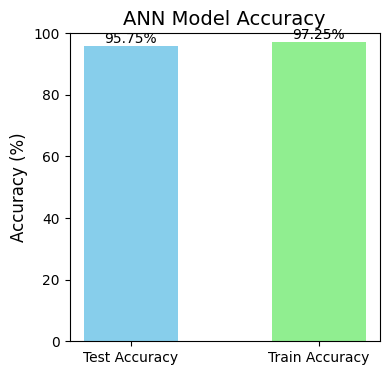

In [24]:
import matplotlib.pyplot as plt

# Accuracy data
categories = ['Test Accuracy', 'Train Accuracy']
values = [95.75, 97.25]  # Replace with your actual accuracy scores

# Generate the vertical bar graph with smaller dimensions
plt.figure(figsize=(4, 4))  # Reduced width and height
plt.bar(categories, values, color=['skyblue', 'lightgreen'], width=0.5)  # Adjusted bar width
plt.title('ANN Model Accuracy', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 100)  # Set y-axis range to 0-100%
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display percentage on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v}%", ha='center', fontsize=10)

# Show the plot
plt.show()


*Comparison*

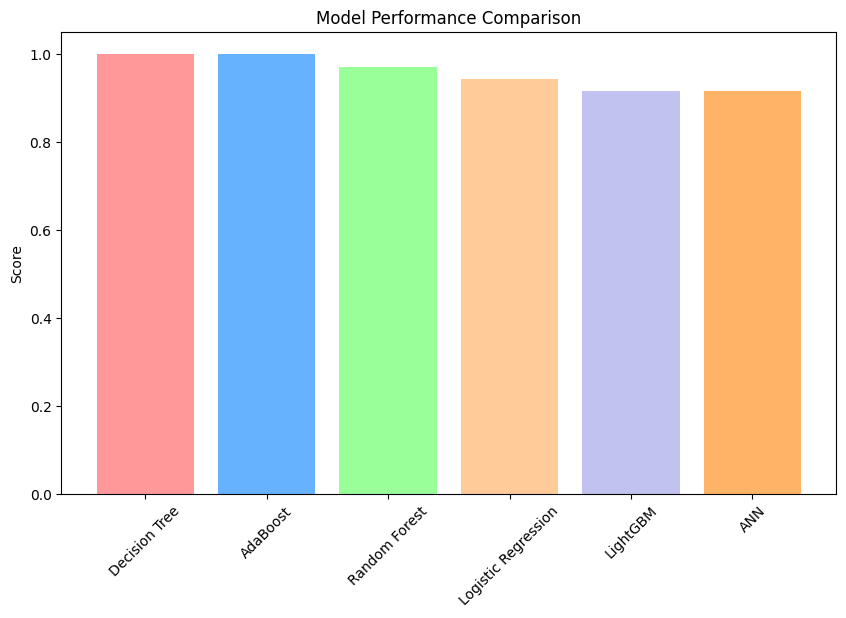

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your scores and model names
score = [DT_SC, RF_SC, lgbm_HSC, adb_HSC, lr_HSC, ann_hc]
model_names = ["Decision Tree", "Random Forest", "LightGBM", "AdaBoost", "Logistic Regression", "ANN"]

# Create a DataFrame
Models = pd.DataFrame({
    'Model': model_names,
    'Score': score
})

# Sort values by score for better visualization
Models = Models.sort_values(by='Score', ascending=False)

# Define colors for each bar
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#C2C2F0', '#FFB366']

# Plot the vertical bar graph
plt.figure(figsize=(10, 6))
plt.bar(Models['Model'], Models['Score'], color=colors)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)  # Rotate model names for readability
plt.show()


*Other Comparision*

<Figure size 1200x600 with 0 Axes>

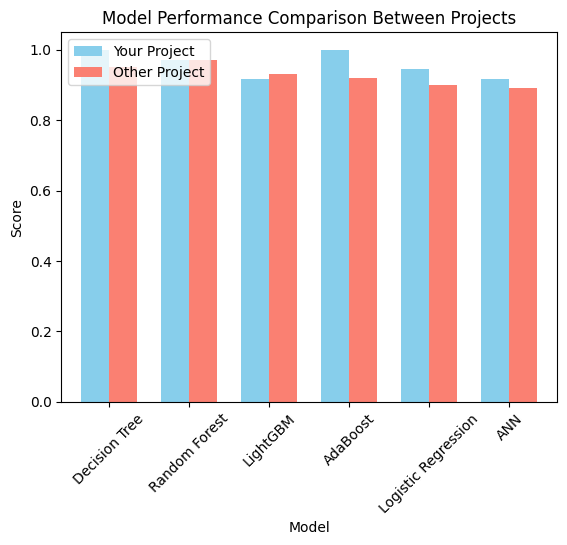

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your project scores
your_scores = [DT_SC, RF_SC, lgbm_HSC, adb_HSC, lr_HSC, ann_hc]
model_names = ["Decision Tree", "Random Forest", "LightGBM", "AdaBoost", "Logistic Regression", "ANN"]

# Define scores from another project (replace with actual values for comparison)
other_project_scores = [0.95, 0.97, 0.93, 0.92, 0.90, 0.89]  # Example values

# Create a DataFrame
data = {
    'Model': model_names,
    'Our Project': your_scores,
    'Other Project': other_project_scores
}
comparison_df = pd.DataFrame(data)

# Plot the bar graph
plt.figure(figsize=(12, 6))
comparison_df.plot(x='Model', kind='bar', color=['skyblue', 'salmon'], width=0.7)
plt.ylabel('Score')
plt.title('Model Performance Comparison Between Projects')
plt.xticks(rotation=45)  # Rotate x labels for readability
plt.legend(loc="upper left")
plt.show()


*Saving The Model*

In [ ]:
import pickle 

In [ ]:
# save the model
model = DT  # Your machine learning model object
file_path = 'DT-cyber.pkl'  # Path to the file where you want to save the model

with open(file_path, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
import pickle
# load the model

file_path = 'DT-cyber.pkl'  # Path to the saved model file

with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)

*User's Prediction*

In [ ]:
loaded_model.predict([[97,1,55,651.4,127.37,62.26,189.63]])

array([0])

In [ ]:
loaded_model.predict([[0,0,58,0.0,83.74,42.96,126.7]])

array([1])

In [ ]:
loaded_model.predict([[87,1,61,100.1,138.27,85.07,223.34]])

array([2])

In [ ]:
loaded_model.predict([[100,0,26,0.0,126.74,53.45,180.19]])

array([1])